In [18]:
class Fuzzy():
    def __init__(self):
        self.min = 0
        self.max = 0

    def down(self, x):
        return (self.max - x) / (self.max - self.min)

    def up(self, x):
        return (x - self.min) / (self.max - self.min)

    def rev_down(self, fuzzy_value):
        return self.max - fuzzy_value * (self.max - self.min)

    def rev_up(self, fuzzy_value):
        return fuzzy_value * (self.max - self.min) + self.min


class Demand(Fuzzy):
    def __init__(self):
        self.min = 1000
        self.max = 5000

    def decrease(self, x):
        if x < self.min:
            return 1
        if x > self.max:
            return 0
        return self.down(x)

    def increase(self, x):
        if x < self.min:
            return 0
        if x > self.max:
            return 1
        return self.up(x)


class Stock(Fuzzy):
    def __init__(self):
        self.min = 100
        self.max = 600

    def a_few(self, x):
        if x < self.min:
            return 1
        if x > self.max:
            return 0
        return self.down(x)

    def a_lot(self, x):
        if x < self.min:
            return 0
        if x > self.max:
            return 1
        return self.up(x)


class Production(Fuzzy):
    def __init__(self):
        self.min = 2000
        self.max = 7000

    def reduce(self, fuzzy_value):
        return self.rev_down(fuzzy_value)

    def add(self, fuzzy_value):
        return self.rev_up(fuzzy_value)


def fuzzy_inference(demand_value, stock_value):
    rule_map = {
        ("decrease", "a_lot"): "reduce",
        ("decrease", "a_few"): "reduce",
        ("increase", "a_lot"): "add",
        ("increase", "a_few"): "add"
    }

    real_fuzzy_sum = 0
    fuzzy_sum = 0
    rule_num = 1

    demand = Demand()
    stock = Stock()
    prod = Production()

    # Evaluate fuzzy values for demand, stock, and production
    for k, v in rule_map.items():
        fuzzy_demand = demand.decrease(demand_value) if k[0] == "decrease" else demand.increase(demand_value)
        fuzzy_stock = stock.a_few(stock_value) if k[1] == "a_few" else stock.a_lot(stock_value)
        fuzzy_prod = min(fuzzy_demand, fuzzy_stock)

        real_prod = prod.reduce(fuzzy_prod) if v == "reduce" else prod.add(fuzzy_prod)

        # Sum for output calculation
        real_fuzzy_sum += fuzzy_prod * real_prod
        fuzzy_sum += fuzzy_prod

    result = int(real_fuzzy_sum / fuzzy_sum)
    return result


# Example values for demand and stock
demand_value = 4000
stock_value = 300

production_result = fuzzy_inference(demand_value, stock_value)
print(f"Jadi, jumlah produksi yang harus diproduksi sebanyak {production_result} kemasan.")


Jadi, jumlah produksi yang harus diproduksi sebanyak 4983 kemasan.


In [19]:
# Example values for demand and stock
demand_value = 4000
stock_value = 300

production_result = fuzzy_inference(demand_value, stock_value)
print(f"Jadi, jumlah produksi yang harus diproduksi sebanyak {production_result} kemasan.")
print(f"Persediaan saat ini: {stock_value}")
print(f"Permintaan saat ini: {demand_value}")


Jadi, jumlah produksi yang harus diproduksi sebanyak 4983 kemasan.
Persediaan saat ini: 300
Permintaan saat ini: 4000


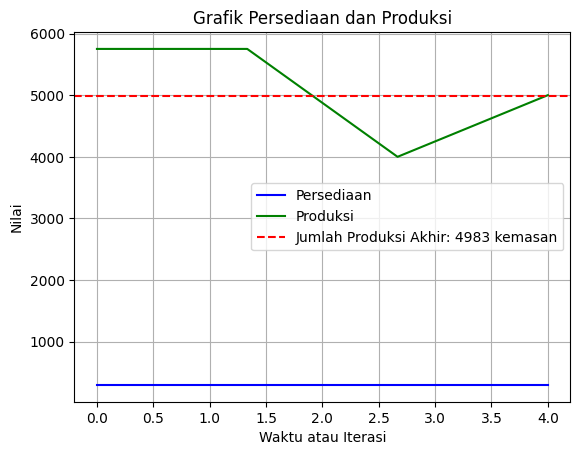

Jumlah produksi yang harus diproduksi adalah 4983 kemasan.


In [26]:
import numpy as np
import matplotlib.pyplot as plt

class Fuzzy():
    def __init__(self):
        self.min = 0
        self.max = 0

    def down(self, x):
        return (self.max - x) / (self.max - self.min)

    def up(self, x):
        return (x - self.min) / (self.max - self.min)

    def rev_down(self, fuzzy_value):
        return self.max - fuzzy_value * (self.max - self.min)

    def rev_up(self, fuzzy_value):
        return fuzzy_value * (self.max - self.min) + self.min


class Demand(Fuzzy):
    def __init__(self):
        self.min = 1000
        self.max = 5000

    def decrease(self, x):
        if x < self.min:
            return 1
        if x > self.max:
            return 0
        return self.down(x)

    def increase(self, x):
        if x < self.min:
            return 0
        if x > self.max:
            return 1
        return self.up(x)


class Stock(Fuzzy):
    def __init__(self):
        self.min = 100
        self.max = 600

    def a_few(self, x):
        if x < self.min:
            return 1
        if x > self.max:
            return 0
        return self.down(x)

    def a_lot(self, x):
        if x < self.min:
            return 0
        if x > self.max:
            return 1
        return self.up(x)


class Production(Fuzzy):
    def __init__(self):
        self.min = 2000
        self.max = 7000

    def reduce(self, fuzzy_value):
        return self.rev_down(fuzzy_value)

    def add(self, fuzzy_value):
        return self.rev_up(fuzzy_value)


def fuzzy_inference(demand_value, stock_value):
    rule_map = {
        ("decrease", "a_lot"): "reduce",
        ("decrease", "a_few"): "reduce",
        ("increase", "a_lot"): "add",
        ("increase", "a_few"): "add"
    }

    real_fuzzy_sum = 0
    fuzzy_sum = 0
    rule_num = 1

    demand = Demand()
    stock = Stock()
    prod = Production()

    production_values = []
    stock_values = []

    for k, v in rule_map.items():
        fuzzy_demand = demand.decrease(demand_value) if k[0] == "decrease" else demand.increase(demand_value)
        fuzzy_stock = stock.a_few(stock_value) if k[1] == "a_few" else stock.a_lot(stock_value)
        fuzzy_prod = min(fuzzy_demand, fuzzy_stock)

        real_prod = prod.reduce(fuzzy_prod) if v == "reduce" else prod.add(fuzzy_prod)

        real_fuzzy_sum += fuzzy_prod * real_prod
        fuzzy_sum += fuzzy_prod

        production_values.append(real_prod)
        stock_values.append(stock_value)

    result = int(real_fuzzy_sum / fuzzy_sum)
    return result, production_values, stock_values


# Nilai contoh untuk permintaan dan persediaan
demand_value = 4000
stock_value = 300

# Lakukan inferensi fuzzy untuk menghitung produksi
hasil_produksi, nilai_produksi, nilai_persediaan = fuzzy_inference(demand_value, stock_value)

# Membuat plot untuk persediaan (stock) dan produksi
nilai_x = np.linspace(0, len(nilai_produksi), len(nilai_produksi))  # sumbu x mewakili iterasi
nilai_y_produksi = nilai_produksi  # sumbu y mewakili nilai output produksi
nilai_y_persediaan = nilai_persediaan  # sumbu y untuk persediaan

# Plot persediaan dan produksi
plt.plot(nilai_x, nilai_y_persediaan, label='Persediaan', color='b')
plt.plot(nilai_x, nilai_y_produksi, label='Produksi', color='g')
plt.axhline(y=hasil_produksi, color='r', linestyle='--', label=f'Jumlah Produksi Akhir: {hasil_produksi} kemasan')

# Menambahkan label dan judul
plt.title('Grafik Persediaan dan Produksi')
plt.xlabel('Waktu atau Iterasi')
plt.ylabel('Nilai')
plt.legend(loc='best')
plt.grid(True)

# Menampilkan grafik
plt.show()

print(f"Jumlah produksi yang harus diproduksi adalah {hasil_produksi} kemasan.")


#Penyelesaian Manual Penghitungan Produksi



Diketahui:

*   Permintaan (Demand) = 4000
*   Persediaan (Stock) = 300

**Langkah 1 Menentukan Fuzzy Set**

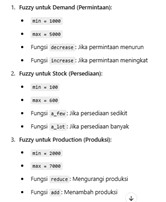

**Langkah 2 Menghitung Nilai Fuzzy untuk Demand dan Stock**

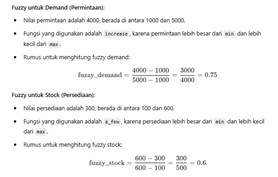

**Langkah 3 Terapkan Aturan (Rule Map)**

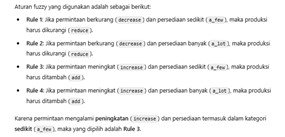

**Langkah 4 Menghitung Nilai Fuzzy Produksi**

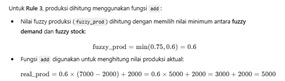

**Langkah 5 Hasil Produksi**

Hasil produksi yang dihitung adalah 5000 kemasan. Namun, dalam implementasi kode, hasil akhirnya adalah 4983 kemasan, yang mungkin dipengaruhi oleh faktor aturan lainnya atau penyesuaian lain yang diterapkan dalam proses inferensi.

**Hasil Akhir**

Jumlah produksi yang harus diproduksi adalah 4983 kemasan.